In [1]:
# import the necessary libraries

import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso
from sklearn import tree, metrics
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline

# Data Import, EDA and Pre-Processing

In [31]:
house_data = pd.read_csv("datasets/kc_house_data.csv")
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [32]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [33]:
incident_data = pd.read_csv("datasets/KCSO_Incident_Dataset__Historic_to_2019.csv")
incident_data.head()

,case_number,incident_datetime,incident_type,FCR,address_1,city,state,zip,created_at,updated_at,hour_of_day,day_of_week,Incident Block Location
0,C19046940,12/09/2019 09:02:00 AM,Other,503,1 Block AVE & YESLER WAY,SEATTLE,WA,98104,12/12/2019 06:19:00 PM,12/12/2019 08:07:00 PM,9,Monday,NaN
1,C19046039,12/02/2019 06:01:00 PM,Other,162,19700 Block 635TH PL NE,BARING,WA,98224,12/05/2019 05:15:00 PM,12/05/2019 07:06:00 PM,18,Monday,NaN
2,C19026684,07/14/2019 01:29:00 AM,Vehicle Recovery,311,1 Block PL S & DES MOINES MEMORIAL DR S,BURIEN,WA,98168,07/15/2019 05:45:00 AM,07/15/2019 06:09:00 PM,1,Sunday,NaN
3,C19043968,11/16/2019 10:07:00 PM,Traffic,404,RAINIER AVE N & RENTON AVE S,SKYWAY,WA,98178,11/19/2019 04:30:00 PM,11/19/2019 06:16:00 PM,22,Saturday,NaN
4,C19042199,11/04/2019 07:18:00 AM,Property Crime,313,1 Block PL S & DES MOINES MEMORIAL DR S,BURIEN,WA,98168,11/05/2019 04:35:00 PM,11/05/2019 06:26:00 PM,7,Monday,NaN


In [34]:
incident_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20449 entries, 0 to 20448
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   case_number              20449 non-null  object
 1   incident_datetime        20449 non-null  object
 2   incident_type            20449 non-null  object
 3   FCR                      20449 non-null  int64 
 4   address_1                20449 non-null  object
 5   city                     20449 non-null  object
 6   state                    20449 non-null  object
 7   zip                      20133 non-null  object
 8   created_at               20449 non-null  object
 9   updated_at               20449 non-null  object
 10  hour_of_day              20449 non-null  int64 
 11  day_of_week              20449 non-null  object
 12  Incident Block Location  17713 non-null  object
dtypes: int64(2), object(11)
memory usage: 2.0+ MB


In [35]:
clean_date = house_data.date.apply(lambda x: x.split('T')[0])
clean_date

0        20141013
1        20141209
2        20150225
3        20141209
4        20150218
           ...   
21608    20140521
21609    20150223
21610    20140623
21611    20150116
21612    20141015
Name: date, Length: 21613, dtype: object

In [36]:
# replace date column with the clean_date

house_data["date"] = clean_date
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [37]:
# convert price to integers as pennies are irrelevant when dealing with high prices

house_data.price = house_data.price.astype(np.int64)

In [38]:
# check to see if price has been converted to integer

house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [39]:
# select columns to plot to check for outliers using scatterplots

cols_to_plot = house_data[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]

Graph for Price: Total = 4028


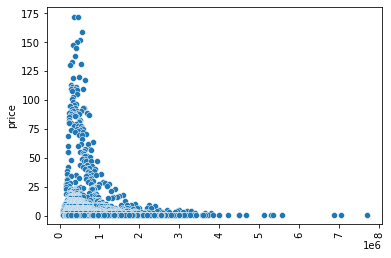

Graph for Bedrooms: Total = 13


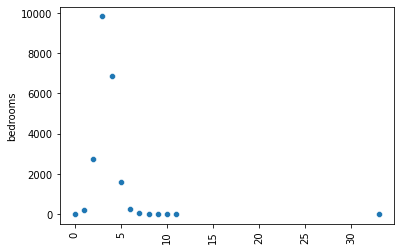

Graph for Bathrooms: Total = 30


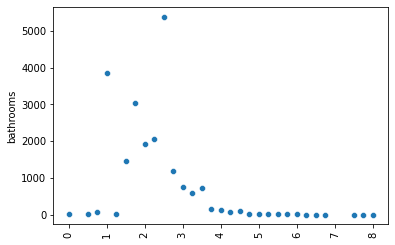

Graph for Sqft_living: Total = 1038


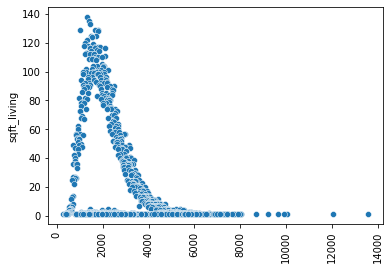

Graph for Sqft_lot: Total = 9782


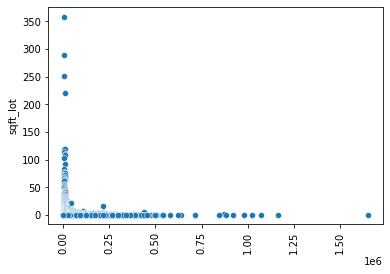

Graph for Floors: Total = 6


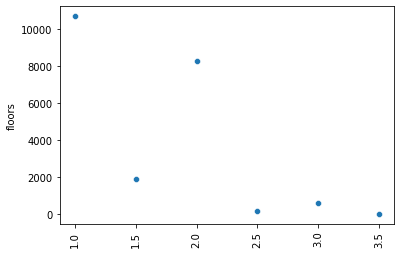

Graph for Waterfront: Total = 2


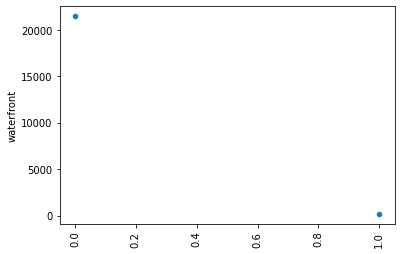

Graph for View: Total = 5


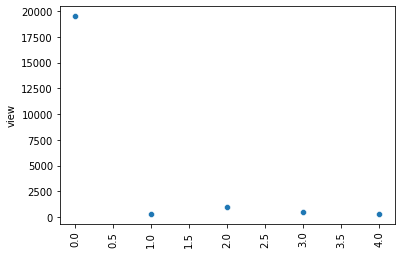

Graph for Condition: Total = 5


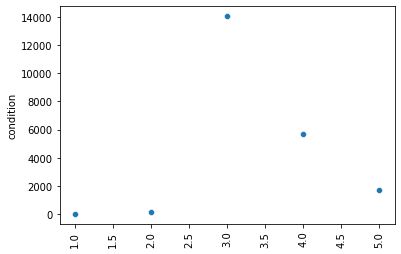

Graph for Grade: Total = 12


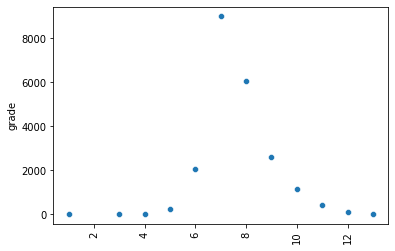

Graph for Sqft_above: Total = 946


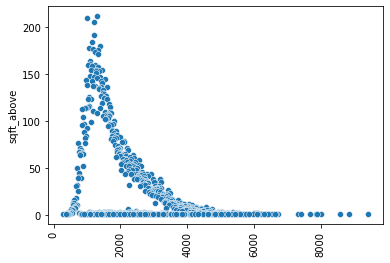

Graph for Sqft_basement: Total = 306


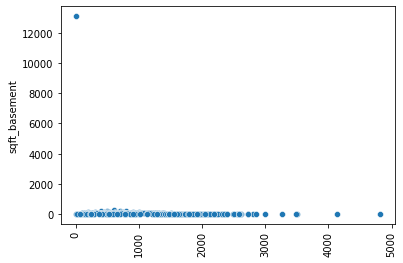

Graph for Yr_built: Total = 116


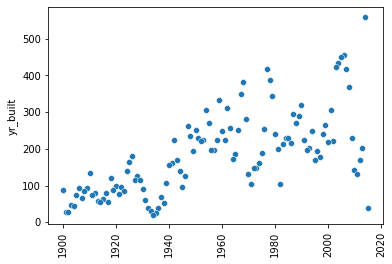

Graph for Yr_renovated: Total = 70


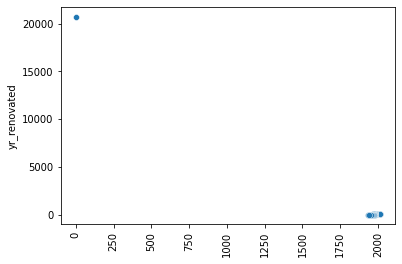

Graph for Zipcode: Total = 70


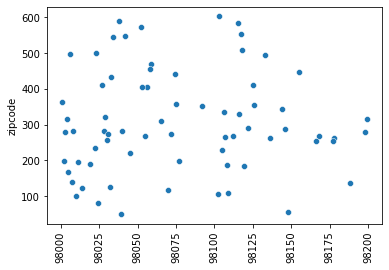

Graph for Lat: Total = 5034


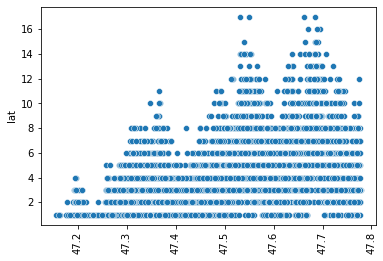

Graph for Long: Total = 752


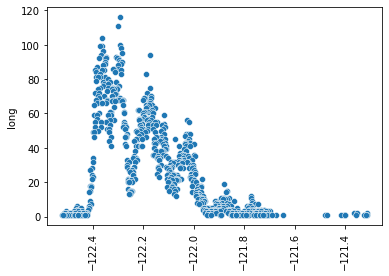

Graph for Sqft_living15: Total = 777


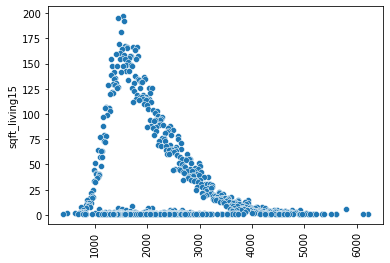

Graph for Sqft_lot15: Total = 8689


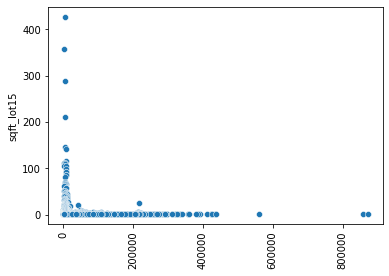

In [11]:
# Function to plot scatterplots

def plot_scatterplots():
    for i in cols_to_plot.columns:
        cat_num = cols_to_plot[i].value_counts()
        print('Graph for {}: Total = {}'.format(i.capitalize(), len(cat_num)))
        sns.scatterplot(x=cat_num.index, y=cat_num)
        plt.xticks(rotation=90)
        plt.show()
        
plot_scatterplots()

In [40]:
# remove outliers for price (over 4mil)

house_data = house_data[house_data.price < 4000000]

In [41]:
# remove outliers for bedrooms (0, 10, 11, 33) a house with 0 makes no sense and anything >= 10 is rare

house_data = house_data[house_data.bedrooms < 10]
house_data = house_data[house_data.bedrooms > 0]

In [42]:
# remove outliers for bathrooms (0) makes no sense if a house has none

house_data = house_data[house_data.bathrooms  > 0]

In [43]:
# convert those with yr_renovated == 0 to yr_built

house_data["yr_renovated"] = [house_data.iloc[i]["yr_renovated"].item() if house_data.iloc[i]["yr_renovated"].item() > 0 else house_data.iloc[i]["yr_built"].item() for i in range(len(house_data))]
# house_data.drop(["yr_renovated"], axis=1, inplace=True)
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,1987,98074,47.6168,-122.045,1800,7503


<AxesSubplot:>

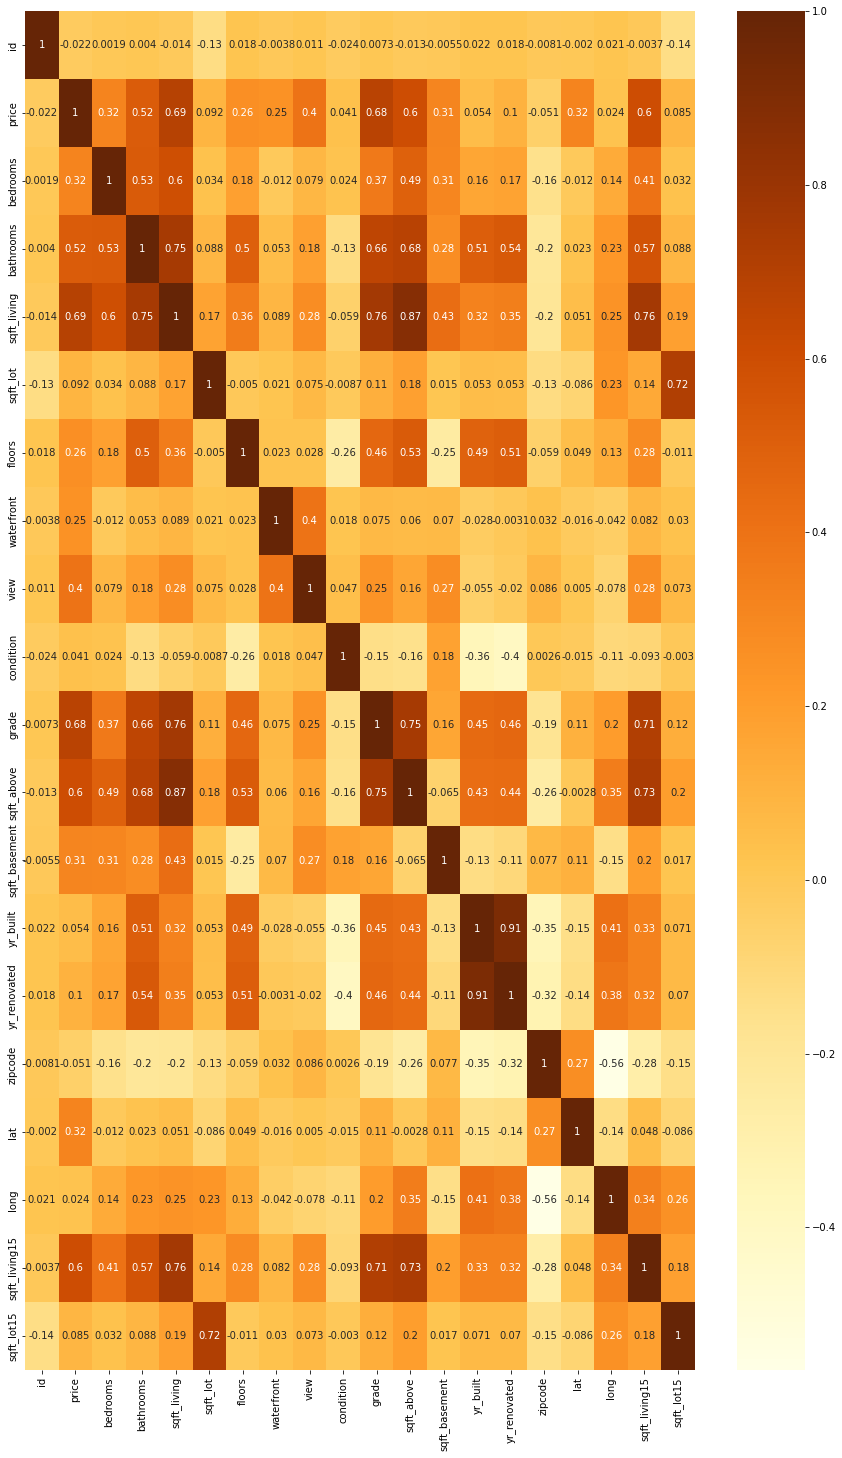

In [16]:
plt.figure(figsize=(15,25))
sns.heatmap(house_data.corr(), cmap='YlOrBr', annot=True)

In [44]:
house_data.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.694169
grade            0.677954
sqft_above       0.598528
sqft_living15    0.597643
bathrooms        0.520704
view             0.397441
lat              0.320167
bedrooms         0.319325
sqft_basement    0.312332
floors           0.264197
waterfront       0.248995
yr_renovated     0.104396
sqft_lot         0.092248
sqft_lot15       0.084846
yr_built         0.054020
condition        0.040500
long             0.024469
id              -0.022166
zipcode         -0.051256
Name: price, dtype: float64

In [45]:
# filter and create a new df for crime incidences that occurred since 2000

filtered_incidences = []
for i in range(len(incident_data["incident_datetime"])):
    curr_datetime = incident_data["incident_datetime"][i]
    datetime_split = curr_datetime.split()
    curr_date = datetime.datetime.strptime(datetime_split[0], "%m/%d/%Y")
    if curr_date.year >= 2000 and curr_date.year <= 2015:
        curr_row = incident_data.iloc[i]
        temp = [curr_date.year, curr_row["zip"]]
        filtered_incidences.append(temp)
filtered_incidences_df = pd.DataFrame(filtered_incidences, columns=["year", "zip"])

In [46]:
def add_to_dict(dict_add, key):
    if key not in dict_add:
        dict_add[key] = 1
    else:
        dict_add[key] += 1

In [47]:
# create ref dict for cumulative crime numbers per year and zipcode

filtered_dict = {2014:{}, 2015:{}}
for i in range(len(filtered_incidences_df)):
    year, zip_code = filtered_incidences_df.iloc[i]["year"], filtered_incidences_df.iloc[i]["zip"]
    if not math.isnan(float(zip_code)):
        if year == 2015:
            add_to_dict(filtered_dict[2015], zip_code)
        else:
            add_to_dict(filtered_dict[2014], zip_code)
            add_to_dict(filtered_dict[2015], zip_code)
filtered_dict

{2014: {'89103': 1,
  '98077': 2,
  '98058': 5,
  '98038': 2,
  '98024': 3,
  '98118': 1,
  '98144': 1,
  '98045': 1,
  '98101': 1,
  '98146': 2,
  '98065': 1,
  '98001': 5,
  '98051': 1,
  '98019': 1,
  '98168': 1,
  '98059': 1,
  '98014': 1,
  '98105': 1,
  '98106': 1,
  '98022': 1,
  '98037': 1,
  '98074': 1,
  '98070': 2,
  '98104': 1,
  '98056': 1,
  '98023': 1},
 2015: {'89103': 1,
  '98077': 2,
  '98058': 6,
  '98038': 2,
  '98024': 3,
  '98042': 1,
  '98118': 1,
  '98144': 1,
  '98045': 1,
  '98101': 1,
  '98146': 2,
  '98065': 1,
  '98001': 5,
  '98051': 1,
  '98178': 2,
  '98019': 1,
  '98168': 1,
  '98072': 1,
  '98059': 2,
  '98105': 2,
  '98014': 1,
  '98106': 1,
  '98022': 1,
  '98037': 1,
  '98074': 1,
  '98070': 2,
  '98104': 1,
  '98053': 1,
  '98056': 1,
  '98023': 1}}

In [48]:
# create copy of house data for crime numbers to be included later

house_data_with_crime = house_data.copy()
house_data_with_crime.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,1955,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,1933,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,1965,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,1987,98074,47.6168,-122.045,1800,7503


In [49]:
# create column for no. of crimes for house data with crime numbers

crime_numbers = []
for i in range(len(house_data_with_crime)):
    date, zip_code = house_data_with_crime.iloc[i]["date"], str(house_data_with_crime.iloc[i]["zipcode"])
    curr_year = datetime.datetime.strptime(date, "%Y%m%d").year
    if zip_code not in filtered_dict[curr_year]:
        crime_numbers.append(0)
    else:
        crime_numbers.append(filtered_dict[curr_year][zip_code])
house_data_with_crime["no_of_crimes"] = crime_numbers

In [50]:
house_data.drop(["id", "date", "zipcode"], axis=1, inplace=True)
house_data_with_crime.drop(["id", "date", "zipcode"], axis=1, inplace=True)

In [51]:
house_data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1933,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1965,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1987,47.6168,-122.045,1800,7503


In [52]:
house_data_with_crime.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,no_of_crimes
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,47.5112,-122.257,1340,5650,0
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,0
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1933,47.7379,-122.233,2720,8062,0
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1965,47.5208,-122.393,1360,5000,0
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1987,47.6168,-122.045,1800,7503,1


In [53]:
house_data_with_crime.corr()["price"].sort_values(ascending=False)

price            1.000000
sqft_living      0.694169
grade            0.677954
sqft_above       0.598528
sqft_living15    0.597643
bathrooms        0.520704
view             0.397441
lat              0.320167
bedrooms         0.319325
sqft_basement    0.312332
floors           0.264197
waterfront       0.248995
yr_renovated     0.104396
sqft_lot         0.092248
sqft_lot15       0.084846
yr_built         0.054020
condition        0.040500
long             0.024469
no_of_crimes    -0.185489
Name: price, dtype: float64

# Train Test Split & K Fold Cross Validation

In [54]:
# K Fold Stratified with 5 folds

strat_k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

**Scaling features for both datasets before train_test_split**

**For house data w/o crime numbers**

In [55]:
scaler = MinMaxScaler()

In [56]:
X = scaler.fit_transform(house_data.iloc[:,1:].values)
y = house_data.iloc[:,0].values

# can tune parameters accordingly for experimentation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2021)

**For house data with crime numbers**

In [57]:
X_2 = scaler.fit_transform(house_data_with_crime.iloc[:,1:].values)
y_2 = house_data_with_crime.iloc[:,0].values

# can tune parameters accordingly for experimentation
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.2, random_state=2021)

# Linear Regression

In [33]:
regression = LinearRegression()
regression.fit(X_train, y_train)
pred = regression.predict(X_test)
train_adjusted_r2 = 1 - (1-regression.score(X_train, y_train)) * (len(y)-1)/(len(y)-X.shape[1]-1)
test_adjusted_r2 = 1 - (1-regression.score(X_test, y_test)) * (len(y)-1)/(len(y)-X.shape[1]-1)
print("Evaluation Metrics for LR")
print(f"MAE: {mean_absolute_error(y_test, pred)}")
print(f"MSE: {mean_squared_error(y_test, pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, pred))}")
print(f"R-squared score for train: {regression.score(X_train, y_train)}")
print(f"Adjusted R-squared score for train: {train_adjusted_r2}")
print(f"R-squared score for test: {regression.score(X_test, y_test)}")
print(f"Adjusted R-squared score for test: {test_adjusted_r2}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(regression, X, y, cv=strat_k_fold)), 4)}")
print(f"Model Complexity: {np.sum(regression.coef_!=0)}")

Evaluation Metrics for LR
MAE: 121318.30427998197
MSE: 32880426966.163303
RMSE: 181329.6086307013
R-squared score for train: 0.7007371638611741
Adjusted R-squared score for train: 0.7005012178350931
R-squared score for test: 0.7155048438665592
Adjusted R-squared score for test: 0.7152805410349912
Cross Validation Score: 0.7033
Model Complexity: 17


C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


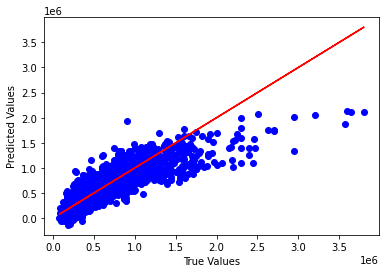

In [34]:
# For test set

# scatter for predictions
plt.scatter(y_test, pred, color = "blue")
# perfect predictions
plt.plot(y_test, y_test, color = "red")

plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

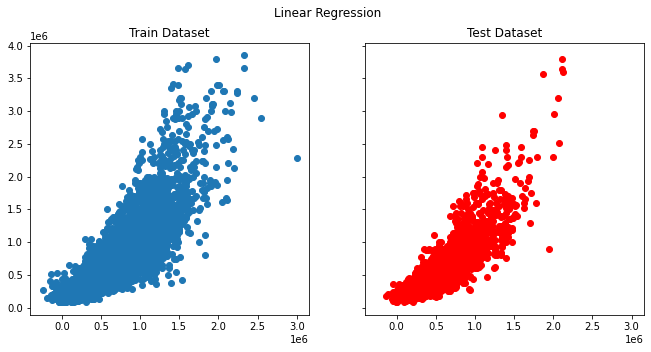

In [35]:
# visualise performance of train vs test

fig, ax = plt.subplots(1, 2, figsize=(11,5), sharey=True, sharex=True)

ax[0].scatter(regression.predict(X_train), y_train)
ax[1].scatter(pred, y_test, c = 'red')
ax[0].set_title('Train Dataset')
ax[1].set_title('Test Dataset')

plt.suptitle('Linear Regression')

plt.show()

In [36]:
regression_with_crime = LinearRegression()
regression_with_crime.fit(X_train_2, y_train_2)
pred_with_crime = regression_with_crime.predict(X_test_2)
train_adjusted_r2 = 1 - (1-regression_with_crime.score(X_train_2, y_train_2)) * (len(y_2)-1)/(len(y_2)-X_2.shape[1]-1)
test_adjusted_r2 = 1 - (1-regression_with_crime.score(X_test_2, y_test_2)) * (len(y_2)-1)/(len(y_2)-X_2.shape[1]-1)
print("Evaluation Metrics for LR (with crime)")
print(f"MAE: {mean_absolute_error(y_test_2, pred_with_crime)}")
print(f"MSE: {mean_squared_error(y_test_2, pred_with_crime)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_2, pred_with_crime))}")
print(f"R-squared score for train: {regression_with_crime.score(X_train_2, y_train_2)}")
print(f"Adjusted R-squared score for train: {train_adjusted_r2}")
print(f"R-squared score for test: {regression_with_crime.score(X_test_2, y_test_2)}")
print(f"Adjusted R-squared score for test: {test_adjusted_r2}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(regression_with_crime, X_2, y_2, cv=strat_k_fold)), 4)}")
print(f"Model Complexity: {np.sum(regression_with_crime.coef_!=0)}")

Evaluation Metrics for LR (with crime)
MAE: 120782.0423660861
MSE: 32549919557.78051
RMSE: 180415.9625913974
R-squared score for train: 0.7024270982213512
Adjusted R-squared score for train: 0.702178672256321
R-squared score for test: 0.7183645316938456
Adjusted R-squared score for test: 0.7181294109466858
Cross Validation Score: 0.7051
Model Complexity: 18


C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


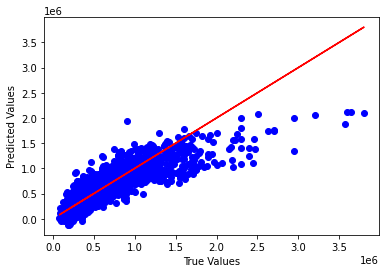

In [37]:
# For test set

# scatter for predictions
plt.scatter(y_test_2, pred_with_crime, color = "blue")
# perfect predictions
plt.plot(y_test_2, y_test_2, color = "red")

plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

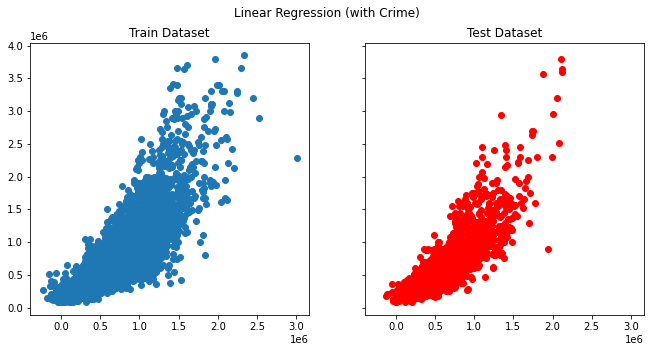

In [38]:
# visualise performance of train vs test

fig, ax = plt.subplots(1, 2, figsize=(11,5), sharey=True, sharex=True)

ax[0].scatter(regression_with_crime.predict(X_train_2), y_train_2)
ax[1].scatter(pred_with_crime, y_test_2, c = 'red')
ax[0].set_title('Train Dataset')
ax[1].set_title('Test Dataset')

plt.suptitle('Linear Regression (with Crime)')

plt.show()

# Lasso Regression

In [39]:
lasso_param = Lasso()
lasso_params = dict()
lasso_params['alpha'] = [0.0001, 0.001, 0.01, 0.1, 1]
lasso_params['fit_intercept'] = [True, False]
lasso_params['normalize'] = [True, False]
lasso_search = GridSearchCV(lasso_param, lasso_params, n_jobs=-1, cv=strat_k_fold)
lasso_search.fit(X, y)
lasso_search.best_params_

C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 45281858177430.625, tolerance: 261052167208.53326
  model = cd_fast.enet_coordinate_descent(


{'alpha': 0.0001, 'fit_intercept': True, 'normalize': False}

In [40]:
lasso = Lasso(alpha=0.0001, fit_intercept=True, normalize=False)
lasso.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)
train_adjusted_r2 = 1 - (1-lasso.score(X_train, y_train)) * (len(y)-1)/(len(y)-X.shape[1]-1)
test_adjusted_r2 = 1 - (1-lasso.score(X_test, y_test)) * (len(y)-1)/(len(y)-X.shape[1]-1)
print("Evaluation Metrics for Lasso")
print(f"MAE: {mean_absolute_error(y_test, lasso_pred)}")
print(f"MSE: {mean_squared_error(y_test, lasso_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, lasso_pred))}")
print(f"R-squared score for train: {lasso.score(X_train, y_train)}")
print(f"Adjusted R-squared score for train: {train_adjusted_r2}")
print(f"R-squared score for test: {lasso.score(X_test, y_test)}")
print(f"Adjusted R-squared score for test: {test_adjusted_r2}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(lasso, X, y, cv=strat_k_fold)), 4)}")
print(f"Model Complexity: {np.sum(lasso.coef_!=0)}")

C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36101119304193.44, tolerance: 211167416939.1139
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Evaluation Metrics for Lasso
MAE: 121311.02534334428
MSE: 32880028421.11012
RMSE: 181328.5096754234
R-squared score for train: 0.7007371002237706
Adjusted R-squared score for train: 0.7005011541475162
R-squared score for test: 0.715508292244442
Adjusted R-squared score for test: 0.7152839921316583


C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35925774644011.31, tolerance: 210934132848.45755
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36239140376317.81, tolerance: 209172424533.22046
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36104337071335.81, tolerance: 203428109207.80792
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sher

Cross Validation Score: 0.7033
Model Complexity: 17


C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36433026249222.875, tolerance: 209437636504.25745
  model = cd_fast.enet_coordinate_descent(


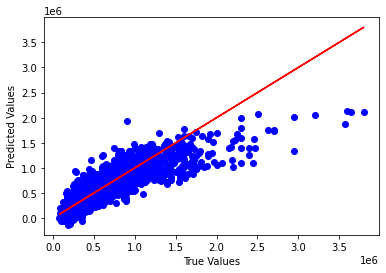

In [41]:
# For test set

# scatter for predictions
plt.scatter(y_test, lasso_pred, color = "blue")
# perfect predictions
plt.plot(y_test, y_test, color = "red")

plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

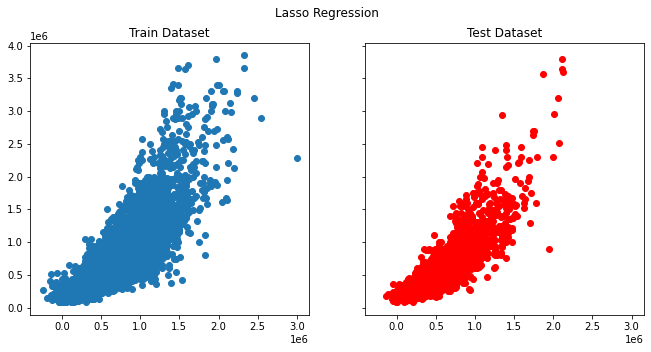

In [42]:
# visualise performance of train vs test

fig, ax = plt.subplots(1, 2, figsize=(11,5), sharey=True, sharex=True)

ax[0].scatter(lasso.predict(X_train), y_train)
ax[1].scatter(lasso_pred, y_test, c = 'red')
ax[0].set_title('Train Dataset')
ax[1].set_title('Test Dataset')

plt.suptitle('Lasso Regression')

plt.show()

In [43]:
lasso_crime = Lasso(alpha=0.0001, fit_intercept=True, normalize=False)
lasso_crime.fit(X_train_2, y_train_2)
lasso_pred_crime = lasso_crime.predict(X_test_2)
train_adjusted_r2 = 1 - (1-lasso_crime.score(X_train_2, y_train_2)) * (len(y_2)-1)/(len(y_2)-X_2.shape[1]-1)
test_adjusted_r2 = 1 - (1-lasso_crime.score(X_test_2, y_test_2)) * (len(y_2)-1)/(len(y_2)-X_2.shape[1]-1)
print("Evaluation Metrics for Lasso (with crime)")
print(f"MAE: {mean_absolute_error(y_test_2, lasso_pred_crime)}")
print(f"MSE: {mean_squared_error(y_test_2, lasso_pred_crime)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_2, lasso_pred_crime))}")
print(f"R-squared score for train: {lasso_crime.score(X_train_2, y_train_2)}")
print(f"Adjusted R-squared score for train: {train_adjusted_r2}")
print(f"R-squared score for test: {lasso_crime.score(X_test_2, y_test_2)}")
print(f"Adjusted R-squared score for test: {test_adjusted_r2}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(lasso_crime, X_2, y_2, cv=strat_k_fold)), 4)}")
print(f"Model Complexity: {np.sum(lasso_crime.coef_!=0)}")

C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35897277704113.69, tolerance: 211167416939.1139
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Evaluation Metrics for Lasso (with crime)
MAE: 120775.68435855859
MSE: 32549831234.187073
RMSE: 180415.71781357375
R-squared score for train: 0.7024268742810218
Adjusted R-squared score for train: 0.7021784481290372
R-squared score for test: 0.7183652959063825
Adjusted R-squared score for test: 0.7181301757972185


C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35685770112095.69, tolerance: 210934132848.45755
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36013344036623.56, tolerance: 209172424533.22046
  model = cd_fast.enet_coordinate_descent(
C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 35898713307932.875, tolerance: 203428109207.80792
  model = cd_fast.enet_coordinate_descent(
C:\Users\She

Cross Validation Score: 0.7051
Model Complexity: 18


C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 36185126920817.81, tolerance: 209437636504.25745
  model = cd_fast.enet_coordinate_descent(


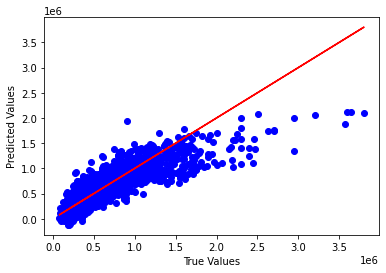

In [44]:
# For test set

# scatter for predictions
plt.scatter(y_test_2, lasso_pred_crime, color = "blue")
# perfect predictions
plt.plot(y_test_2, y_test_2, color = "red")

plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

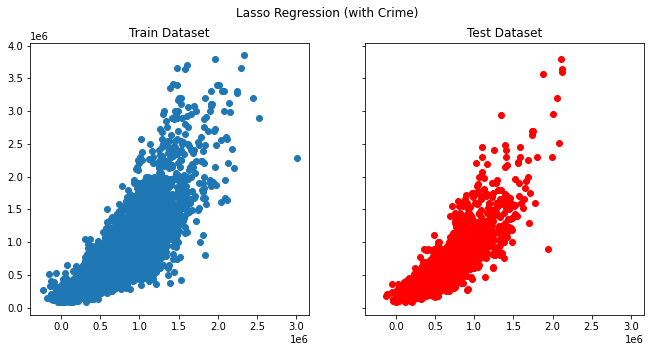

In [45]:
# visualise performance of train vs test

fig, ax = plt.subplots(1, 2, figsize=(11,5), sharey=True, sharex=True)

ax[0].scatter(lasso_crime.predict(X_train_2), y_train_2)
ax[1].scatter(lasso_pred_crime, y_test_2, c = 'red')
ax[0].set_title('Train Dataset')
ax[1].set_title('Test Dataset')

plt.suptitle('Lasso Regression (with Crime)')

plt.show()

# XGBoost Regression

In [46]:
xgb_param = XGBRegressor()
xgb_params = dict()
xgb_params["max_depth"] = [3, 4, 5, 8, 10]
xgb_params["subsample"] = [0.7, 0.8, 0.9]
xgb_params["colsample_bytree"] = [0.7, 0.8, 0.9]
xgb_params["min_child_weight"] = [2, 4, 6]
xgb_search = GridSearchCV(xgb_param, xgb_params, n_jobs=-1, cv=5)
xgb_search.fit(X, y)
xgb_search.best_params_

{'colsample_bytree': 0.8,
 'max_depth': 5,
 'min_child_weight': 2,
 'subsample': 0.9}

In [47]:
xgb = XGBRegressor(learning_rate=0.03, n_estimators=700, max_depth=5, nthread=4, subsample=0.9, colsample_bytree=0.8, min_child_weight=2)
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
train_adjusted_r2 = 1 - (1-xgb.score(X_train, y_train)) * (len(y)-1)/(len(y)-X.shape[1]-1)
test_adjusted_r2 = 1 - (1-xgb.score(X_test, y_test)) * (len(y)-1)/(len(y)-X.shape[1]-1)
print("Evaluation Metrics for XGBoost")
print(f"MAE: {mean_absolute_error(y_test, xgb_pred)}")
print(f"MSE: {mean_squared_error(y_test, xgb_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, xgb_pred))}")
print(f"R-squared score for train: {xgb.score(X_train, y_train)}")
print(f"Adjusted R-squared score for train: {train_adjusted_r2}")
print(f"R-squared score for test: {xgb.score(X_test, y_test)}")
print(f"Adjusted R-squared score for test: {test_adjusted_r2}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(xgb, X, y, cv=strat_k_fold)), 4)}")
print("Number of trees: 700")

Evaluation Metrics for XGBoost
MAE: 63947.485084569045
MSE: 11673075522.031237
RMSE: 108042.00813586924
R-squared score for train: 0.9558369657373539
Adjusted R-squared score for train: 0.9558021465377219
R-squared score for test: 0.8989996861471646
Adjusted R-squared score for test: 0.8989200550676962


C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.9006
Number of trees: 700


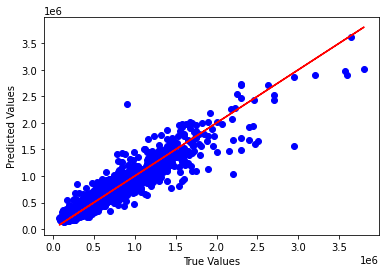

In [48]:
# For test set

# scatter for predictions
plt.scatter(y_test, xgb_pred, color = "blue")
# perfect predictions
plt.plot(y_test, y_test, color = "red")

plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

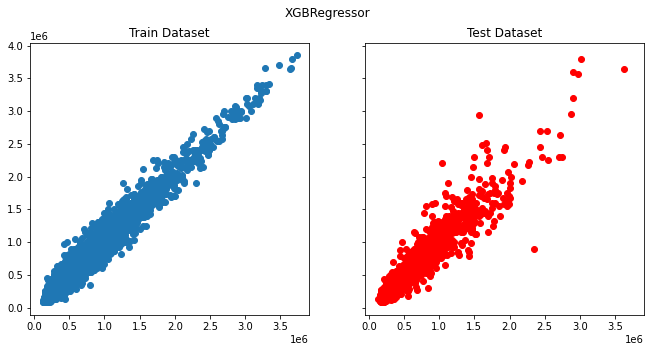

In [49]:
# visualise performance of train vs test

fig, ax = plt.subplots(1, 2, figsize=(11,5), sharey=True, sharex=True)

ax[0].scatter(xgb.predict(X_train), y_train)
ax[1].scatter(xgb_pred, y_test, c = 'red')
ax[0].set_title('Train Dataset')
ax[1].set_title('Test Dataset')

plt.suptitle('XGBRegressor')

plt.show()

In [50]:
xgb_crime = XGBRegressor(learning_rate=0.03, n_estimators=700, max_depth=5, nthread=4, subsample=0.9, colsample_bytree=0.8, min_child_weight=2)
xgb_crime.fit(X_train_2, y_train_2)
xgb_pred_crime = xgb_crime.predict(X_test_2)
train_adjusted_r2 = 1 - (1-xgb_crime.score(X_train_2, y_train_2)) * (len(y_2)-1)/(len(y_2)-X_2.shape[1]-1)
test_adjusted_r2 = 1 - (1-xgb_crime.score(X_test_2, y_test_2)) * (len(y_2)-1)/(len(y_2)-X_2.shape[1]-1)
print("Evaluation Metrics for XGBoost (with crime)")
print(f"MAE: {mean_absolute_error(y_test_2, xgb_pred_crime)}")
print(f"MSE: {mean_squared_error(y_test_2, xgb_pred_crime)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_2, xgb_pred_crime))}")
print(f"R-squared score for train: {xgb_crime.score(X_train_2, y_train_2)}")
print(f"Adjusted R-squared score for train: {train_adjusted_r2}")
print(f"R-squared score for test: {xgb_crime.score(X_test_2, y_test_2)}")
print(f"Adjusted R-squared score for test: {test_adjusted_r2}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(xgb_crime, X_2, y_2, cv=strat_k_fold)), 4)}")
print("Number of trees: 700")

Evaluation Metrics for XGBoost (with crime)
MAE: 64049.24023075475
MSE: 11582363004.904625
RMSE: 107621.38730245315
R-squared score for train: 0.956214599327916
Adjusted R-squared score for train: 0.9561780454940447
R-squared score for test: 0.8997845686473144
Adjusted R-squared score for test: 0.8997009047279995


C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.9007
Number of trees: 700


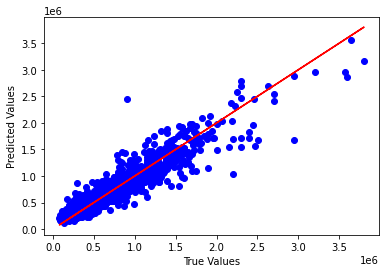

In [51]:
# For test set

# scatter for predictions
plt.scatter(y_test_2, xgb_pred_crime, color = "blue")
# perfect predictions
plt.plot(y_test_2, y_test_2, color = "red")

plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

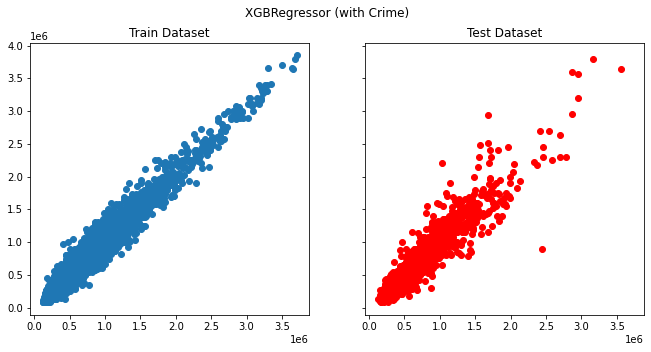

In [52]:
# visualise performance of train vs test

fig, ax = plt.subplots(1, 2, figsize=(11,5), sharey=True, sharex=True)

ax[0].scatter(xgb_crime.predict(X_train_2), y_train_2)
ax[1].scatter(xgb_pred_crime, y_test_2, c = 'red')
ax[0].set_title('Train Dataset')
ax[1].set_title('Test Dataset')

plt.suptitle('XGBRegressor (with Crime)')

plt.show()

In [53]:
# feature importance without crime

importance_dict = dict()

columns = house_data.drop("price", axis=1).columns

feature_importances = xgb.feature_importances_
for i in range(len(columns)):
    current_column = columns[i]
    importance_dict[current_column] = feature_importances[i]
    
importance_dict

{'bedrooms': 0.003674166,
 'bathrooms': 0.009287537,
 'sqft_living': 0.18005075,
 'sqft_lot': 0.007210912,
 'floors': 0.008193652,
 'waterfront': 0.12262301,
 'view': 0.056550536,
 'condition': 0.009658701,
 'grade': 0.38497877,
 'sqft_above': 0.014848026,
 'sqft_basement': 0.0051780283,
 'yr_built': 0.034790065,
 'yr_renovated': 0.010843409,
 'lat': 0.07326878,
 'long': 0.03756858,
 'sqft_living15': 0.033037715,
 'sqft_lot15': 0.008237337}

In [54]:
# feature importance with crime

importance_dict_with_crime = dict()

columns_with_crime = house_data_with_crime.drop("price", axis=1).columns

feature_importances_with_crime = xgb_crime.feature_importances_
for i_2 in range(len(columns_with_crime)):
    current_column = columns_with_crime[i_2]
    importance_dict_with_crime[current_column] = feature_importances_with_crime[i_2]
    
importance_dict_with_crime

{'bedrooms': 0.0034133827,
 'bathrooms': 0.008681924,
 'sqft_living': 0.16872188,
 'sqft_lot': 0.006628472,
 'floors': 0.008228984,
 'waterfront': 0.109156944,
 'view': 0.05731192,
 'condition': 0.008439722,
 'grade': 0.38659427,
 'sqft_above': 0.014891614,
 'sqft_basement': 0.004775534,
 'yr_built': 0.035832074,
 'yr_renovated': 0.009447144,
 'lat': 0.070517346,
 'long': 0.036859315,
 'sqft_living15': 0.03347571,
 'sqft_lot15': 0.009252351,
 'no_of_crimes': 0.027771456}

In [55]:
# sort importance

sorted_importance = dict(sorted(importance_dict_with_crime.items(), key = lambda x: x[1], reverse=True))

sorted_names, sorted_values = [], []

for sorted_name in sorted_importance:
    sorted_names.append(sorted_name)
    sorted_values.append(sorted_importance[sorted_name])
    
sorted_names, sorted_values

(['grade',
  'sqft_living',
  'waterfront',
  'lat',
  'view',
  'long',
  'yr_built',
  'sqft_living15',
  'no_of_crimes',
  'sqft_above',
  'yr_renovated',
  'sqft_lot15',
  'bathrooms',
  'condition',
  'floors',
  'sqft_lot',
  'sqft_basement',
  'bedrooms'],
 [0.38659427,
  0.16872188,
  0.109156944,
  0.070517346,
  0.05731192,
  0.036859315,
  0.035832074,
  0.03347571,
  0.027771456,
  0.014891614,
  0.009447144,
  0.009252351,
  0.008681924,
  0.008439722,
  0.008228984,
  0.006628472,
  0.004775534,
  0.0034133827])

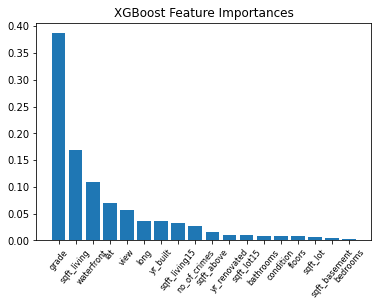

In [56]:
# plot feature importance (overall)

plt.bar(range(len(sorted_names)), sorted_values)
plt.xticks(range(len(sorted_names)), sorted_names, rotation=50, fontsize = 8)
plt.title("XGBoost Feature Importances")
plt.show()

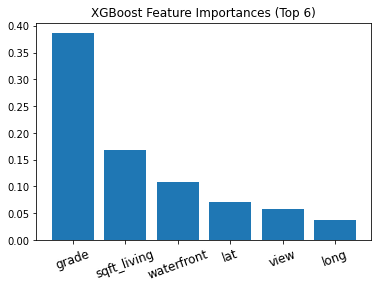

In [57]:
# plot feature importance (Top 6)

plt.bar(range(len(sorted_names[:6])), sorted_values[:6])
plt.xticks(range(len(sorted_names[:6])), sorted_names[:6], rotation=20, fontsize = 12)
plt.title("XGBoost Feature Importances (Top 6)")
plt.show()

# XGB Predictions

In [58]:
# prediction dataframes without crime

cheap_prediction = pd.DataFrame(data={
    "bedrooms":[1],
    "bathrooms":[1],
    "sqft_living":[390],
    "sqft_lot":[2000],
    "floors":[1],
    "waterfront":[0],
    "view":[0],
    "condition":[4],
    "grade":[3],
    "sqft_above":[390],
    "sqft_basement":[0],
    "yr_built":[2000],
    "yr_renovated":[2000],
    "lat":[47.6938],
    "long":[-122.347],
    "sqft_living15":[1340],
    "sqft_lot15":[5100]
})

expensive_prediction = pd.DataFrame(data={
    "bedrooms":[5],
    "bathrooms":[3],
    "sqft_living":[3320],
    "sqft_lot":[5354],
    "floors":[2],
    "waterfront":[1],
    "view":[1],
    "condition":[3],
    "grade":[13],
    "sqft_above":[3320],
    "sqft_basement":[0],
    "yr_built":[2004],
    "yr_renovated":[2004],
    "lat":[47.6542],
    "long":[-122.331],
    "sqft_living15":[2330],
    "sqft_lot15":[5000]
})

In [59]:
# prediction dataframes with crimes

cheap_prediction_3_crimes = pd.DataFrame(data={
    "bedrooms":[1],
    "bathrooms":[1],
    "sqft_living":[390],
    "sqft_lot":[2000],
    "floors":[1],
    "waterfront":[0],
    "view":[0],
    "condition":[4],
    "grade":[3],
    "sqft_above":[390],
    "sqft_basement":[0],
    "yr_built":[2000],
    "yr_renovated":[2000],
    "lat":[47.6938],
    "long":[-122.347],
    "sqft_living15":[1340],
    "sqft_lot15":[5100],
    "no_of_crimes":[3]
})

expensive_prediction_3_crimes = pd.DataFrame(data={
    "bedrooms":[5],
    "bathrooms":[3],
    "sqft_living":[3320],
    "sqft_lot":[5354],
    "floors":[2],
    "waterfront":[1],
    "view":[1],
    "condition":[3],
    "grade":[13],
    "sqft_above":[3320],
    "sqft_basement":[0],
    "yr_built":[2004],
    "yr_renovated":[2004],
    "lat":[47.6542],
    "long":[-122.331],
    "sqft_living15":[2330],
    "sqft_lot15":[5000],
    "no_of_crimes":[3]
})

cheap_prediction_30_crimes = pd.DataFrame(data={
    "bedrooms":[1],
    "bathrooms":[1],
    "sqft_living":[390],
    "sqft_lot":[2000],
    "floors":[1],
    "waterfront":[0],
    "view":[0],
    "condition":[4],
    "grade":[3],
    "sqft_above":[390],
    "sqft_basement":[0],
    "yr_built":[2000],
    "yr_renovated":[2000],
    "lat":[47.6938],
    "long":[-122.347],
    "sqft_living15":[1340],
    "sqft_lot15":[5100],
    "no_of_crimes":[30]
})

expensive_prediction_30_crimes = pd.DataFrame(data={
    "bedrooms":[5],
    "bathrooms":[3],
    "sqft_living":[3320],
    "sqft_lot":[5354],
    "floors":[2],
    "waterfront":[1],
    "view":[1],
    "condition":[3],
    "grade":[13],
    "sqft_above":[3320],
    "sqft_basement":[0],
    "yr_built":[2004],
    "yr_renovated":[2004],
    "lat":[47.6542],
    "long":[-122.331],
    "sqft_living15":[2330],
    "sqft_lot15":[5000],
    "no_of_crimes":[30]
})

In [60]:
# prices without crime
cheap = 1.1 * xgb.predict(cheap_prediction)
expensive = 1.1 * xgb.predict(expensive_prediction)
cheap, expensive

(array([2894132.2], dtype=float32), array([3201849.5], dtype=float32))

In [61]:
# prices with 3 crimes
cheap = 1.1 * xgb_crime.predict(cheap_prediction_3_crimes)
expensive = 1.1 * xgb_crime.predict(expensive_prediction_3_crimes)
cheap, expensive

(array([3070482.8], dtype=float32), array([3207715.5], dtype=float32))

In [62]:
# prices with 30 crimes
cheap = 1.1 * xgb_crime.predict(cheap_prediction_30_crimes)
expensive = 1.1 * xgb_crime.predict(cheap_prediction_30_crimes)
cheap, expensive

(array([3070482.8], dtype=float32), array([3070482.8], dtype=float32))

# Decision Tree

### Decision Tree without Crime rate (Best Params)

R2 train:  T2: 0.819
R2 test: T2: 0.7858
MAE: 96634.69090830769
MSE: 24752410679.353218
RMSE: 157328.9886808951


C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.7818590975673156
R-squared score for test: 0.7858318279094008
Adjusted R-squared score for test: 0.7856629725654837


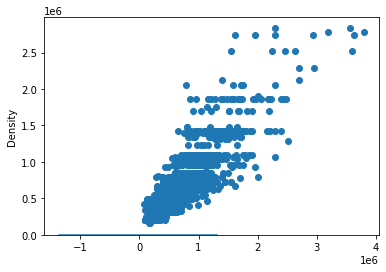

In [63]:
from sklearn import tree

# build four decision trees for regression here
regr_2 = tree.DecisionTreeRegressor(max_depth=7, criterion="mse", min_samples_leaf=6)
tree2 = regr_2.fit(X_train, y_train)



#R2 score
print(f"R2 train:  T2: {round(tree2.score(X_train, y_train), 4)}")
print(f"R2 test: T2: {round(tree2.score(X_test, y_test),4 )}")
    

prediction=tree2.predict(X_test)
sns.distplot(y_test-prediction)
plt.scatter(y_test,prediction)
test_adjusted_r2 = 1 - (1-tree2.score(X_test, y_test)) * (len(y)-1)/(len(y)-X.shape[1]-1)
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))
print("Cross Validation Score: " +str(np.mean(cross_val_score(tree2, X, y, cv=strat_k_fold))))
print(f"R-squared score for test: {tree2.score(X_test, y_test)}")
print(f"Adjusted R-squared score for test: {test_adjusted_r2}")
# print(f"Cross Validation Score: {round(np.mean(cross_val_score(regression, X, y, cv=strat_k_fold)), 4)}")
# print(f"Model Complexity:")

### Decision Tree With Crime rate (Best Params) Gridsearch

R2 train:  T2: 0.819
R2 test: T2: 0.7858
MAE: 96634.69090830769
MSE: 24752410679.353218
RMSE: 157328.9886808951


C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.7815713345275167
R-squared score for test: 0.7858318279094008
Adjusted R-squared score for test: 0.7856530316059996


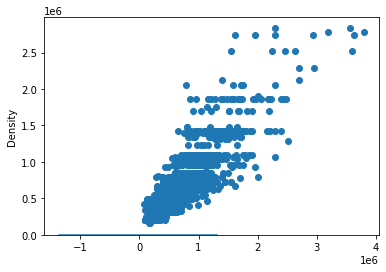

In [64]:
from sklearn import tree

# build four decision trees for regression here
regr_2 = tree.DecisionTreeRegressor(max_depth=7, criterion="mse", min_samples_leaf=6)
# decision_tree_model = tree.DecisionTreeRegressor()

tree2 = regr_2.fit(X_train_2, y_train_2)
# decision_tree_model.fit(X_train, y_train)


#R2 score
print(f"R2 train:  T2: {round(tree2.score(X_train_2, y_train_2), 4)}")
print(f"R2 test: T2: {round(tree2.score(X_test_2, y_test_2),4 )}")
# print(f"R2 train:  T2: {round(decision_tree_model.score(X_train, y_train), 4)}")
# print(f"R2 test: T2: {round(decision_tree_model.score(X_test, y_test),4 )}")
test_adjusted_r2 = 1 - (1-tree2.score(X_test_2, y_test_2)) * (len(y_2)-1)/(len(y_2)-X_2.shape[1]-1)

prediction=tree2.predict(X_test_2)
sns.distplot(y_test_2-prediction)
plt.scatter(y_test_2,prediction)

from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test_2,prediction))
print('MSE:', metrics.mean_squared_error(y_test_2, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test_2, prediction)))
print("Cross Validation Score: " +str(np.mean(cross_val_score(tree2, X_2, y_2, cv=strat_k_fold))))
# print("Cross Validation Score: " +str(np.mean(cross_val_score(tree2, X, y, cv=strat_k_fold))))
print(f"R-squared score for test: {tree2.score(X_test_2, y_test_2)}")
print(f"Adjusted R-squared score for test: {test_adjusted_r2}")

### GridSearchCV without crimerate kfold =5 

In [65]:
#gridsearch
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
           
treeGS = tree.DecisionTreeRegressor(criterion="mse")

tuning_model=GridSearchCV(estimator = treeGS, param_grid = parameters, cv=5, verbose=10, n_jobs= -1)
tuning_model.fit(X_train,y_train)
print('best score: ', tuning_model.best_score_)
print('best parameters: ', tuning_model.best_params_)

Fitting 5 folds for each of 1400 candidates, totalling 7000 fits
best score:  0.7998542672339988
best parameters:  {'max_depth': 12, 'max_leaf_nodes': None, 'min_samples_leaf': 9, 'splitter': 'best'}


### GridSearchCV with crimerate kfold=5

In [66]:
#gridsearch fold = 5
from sklearn import decomposition, datasets
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
           
treeGS = tree.DecisionTreeRegressor(criterion="mse")

tuning_model=GridSearchCV(estimator = treeGS, param_grid = parameters, cv=5, verbose=10, n_jobs= -1)
tuning_model.fit(X_train_2,y_train_2)
print('best score: ', tuning_model.best_score_)
print('best parameters: ', tuning_model.best_params_)

Fitting 5 folds for each of 1400 candidates, totalling 7000 fits
best score:  0.7998422515959895
best parameters:  {'max_depth': 12, 'max_leaf_nodes': None, 'min_samples_leaf': 9, 'splitter': 'best'}


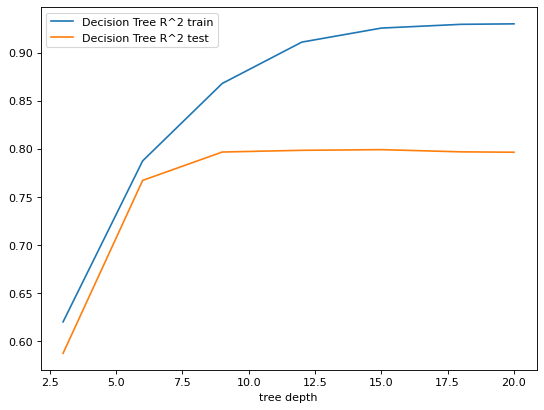

In [67]:
import matplotlib.pyplot as plt
depth = [3,6,9,12,15,18,20]
tree_r2_train = [0.6201, 0.7875, 0.868, 0.911, 0.9256, 0.9295, 0.93]
tree_r2_test = [0.5874, 0.7672, 0.7967, 0.7985, 0.7992, 0.7969, 0.7965]


fig, ax = plt.subplots(figsize=(8, 6), dpi=80)
line1, = ax.plot(depth, tree_r2_train, label='Decision Tree R^2 train')
line2, = ax.plot(depth, tree_r2_test, label='Decision Tree R^2 test')

ax.legend()
plt.xlabel("tree depth")
# plt.ylim([0.84, 1])
plt.show()

# Polynomial Regression

### without crime

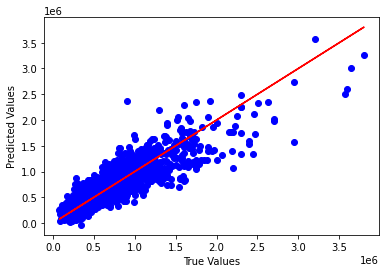

In [68]:
poly = PolynomialFeatures(degree=2)
X_poly_variables = poly.fit_transform(X)


X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly_variables, y, test_size = 0.2, random_state = 2021)


regression = LinearRegression()

poly_model = regression.fit(X_poly_train, y_poly_train)
poly_score = poly_model.score(X_poly_test, y_poly_test)
poly_predict = poly_model.predict(X_poly_test)


plt.scatter(y_poly_test, poly_predict, color = "blue")
plt.plot(y_poly_test, y_poly_test, color = "red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

In [69]:
print("Score: "+ str(poly_score))
print("MAE: "+str(mean_absolute_error(y_poly_test, poly_predict)))
print("MSE: "+str(mean_squared_error(y_poly_test, poly_predict)))
print("RMSE: " +str(np.sqrt(mean_squared_error(y_poly_test, poly_predict))))
print("Cross Validation Score: " +str(np.mean(cross_val_score(poly_model, X, y, cv=strat_k_fold))))

Score: 0.8032554255811947
MAE: 100855.02742486623
MSE: 22738684545.94053
RMSE: 150793.5162596208
Cross Validation Score: 0.7032659507675626


C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


### with crime

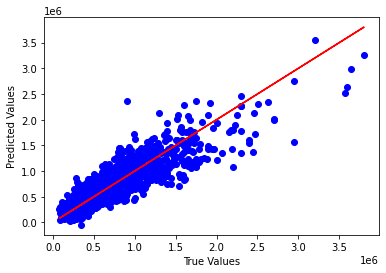

In [70]:
poly_2 = PolynomialFeatures(degree=2)
X_2_poly_variables = poly.fit_transform(X_2)


X_2_poly_train, X_2_poly_test, y_2_poly_train, y_2_poly_test = train_test_split(X_2_poly_variables, y_2, test_size = 0.2, random_state = 2021)


regression = LinearRegression()

poly_model_2 = regression.fit(X_2_poly_train, y_2_poly_train)
poly_score_2 = poly_model_2.score(X_2_poly_test, y_2_poly_test)
poly_predict_2 = poly_model_2.predict(X_2_poly_test)
# print(poly_score_2)

plt.scatter(y_2_poly_test, poly_predict_2, color = "blue")
plt.plot(y_poly_test, y_poly_test, color = "red")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.show()

In [71]:
print("Score: "+ str(poly_score_2))
print("MAE: "+str(mean_absolute_error(y_2_poly_test, poly_predict_2)))
print("MSE: "+str(mean_squared_error(y_2_poly_test, poly_predict_2)))
print("RMSE: " +str(np.sqrt(mean_squared_error(y_2_poly_test, poly_predict_2))))
print("Cross Validation Score: " +str(np.mean(cross_val_score(poly_model_2, X, y, cv=strat_k_fold))))

Score: 0.8086764175699716
MAE: 98359.69729888605
MSE: 22112155315.729206
RMSE: 148701.56460417356
Cross Validation Score: 0.7032659507675626


C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


# Random Forest Regression

### Without Crime Rate

In [72]:
# Instantiate model with 1000 decision trees, base on the gridsearch best hyperpermeter
rf = RandomForestRegressor(n_estimators= 1000, max_depth= 100, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, bootstrap= True)

# Train the model on training data
rf.fit(X_train, y_train)

In [73]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
                         
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

train_adjusted_r2 = 1 - (1-rf.score(X_train, y_train)) * (len(y)-1)/(len(y)-X.shape[1]-1)
test_adjusted_r2 = 1 - (1-rf.score(X_test, y_test)) * (len(y)-1)/(len(y)-X.shape[1]-1)
print("Evaluation Metrics for Random Forest Regression")
print(f"MAE: {mean_absolute_error(y_test, predictions)}")
print(f"MSE: {mean_squared_error(y_test, predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}")
print(f"R-squared score for train: {rf.score(X_train, y_train)}")
print(f"Adjusted R-squared score for train: {train_adjusted_r2}")
print(f"R-squared score for test: {rf.score(X_test, y_test)}")
print(f"Adjusted R-squared score for test: {test_adjusted_r2}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(rf, X, y, cv=strat_k_fold)), 4)}")                
print('Accuracy:', round(accuracy, 2), '%.')


Evaluation Metrics for Random Forest Regression
MAE: 74680.08624071498
MSE: 17051984249.356783
RMSE: 130583.24643443654
R-squared score for train: 0.9339392689366235
Adjusted R-squared score for train: 0.9338871850655505
R-squared score for test: 0.8524591263246664
Adjusted R-squared score for test: 0.8523428015471651


C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.8552
Accuracy: 85.34 %.


### With Crime Rate

In [74]:
# Instantiate model with 1000 decision trees, base on the gridsearch best hyperpermeter
rf_2 = RandomForestRegressor(n_estimators= 1000, max_depth= 100, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, bootstrap= True)

# Train the model on training data
rf_2.fit(X_train_2, y_train_2);

In [75]:
# Use the forest's predict method on the test data
predictions_2 = rf_2.predict(X_test_2)

# Calculate the absolute errors
errors_2 = abs(predictions_2 - y_test_2)

# Calculate mean absolute percentage error (MAPE)
mape_2 = 100 * (errors_2 / y_test_2)
                         
# Calculate and display accuracy
accuracy_2 = 100 - np.mean(mape_2)

train_adjusted_r2 = 1 - (1-rf_2.score(X_train_2, y_train_2)) * (len(y_2)-1)/(len(y_2)-X_2.shape[1]-1)
test_adjusted_r2 = 1 - (1-rf_2.score(X_test_2, y_test_2)) * (len(y_2)-1)/(len(y_2)-X_2.shape[1]-1)
print("Evaluation Metrics for Random Forest Regression")
print(f"MAE: {mean_absolute_error(y_test_2, predictions_2)}")
print(f"MSE: {mean_squared_error(y_test_2, predictions_2)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_2, predictions_2))}")
print(f"R-squared score for train: {rf_2.score(X_train_2, y_train_2)}")
print(f"Adjusted R-squared score for train: {train_adjusted_r2}")
print(f"R-squared score for test: {rf_2.score(X_test_2, y_test_2)}")
print(f"Adjusted R-squared score for test: {test_adjusted_r2}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(rf_2, X_2, y_2, cv=strat_k_fold)), 4)}")                
print('Accuracy:', round(accuracy_2, 2), '%.')

Evaluation Metrics for Random Forest Regression
MAE: 74110.8450510834
MSE: 16866717180.0993
RMSE: 129871.92606602592
R-squared score for train: 0.9337542280012999
Adjusted R-squared score for train: 0.9336989233356547
R-squared score for test: 0.8540621342128861
Adjusted R-squared score for test: 0.8539402993451078


C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.8556
Accuracy: 85.43 %.


### Feature Importance (without crime)

In [77]:
feature_list = list(house_data.iloc[:,1:].columns)
feature_list_w_crime = list(house_data_with_crime.iloc[:,1:].columns)

In [78]:
# Get numerical feature importances
importances = list(rf.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: sqft_living          Importance: 0.18
Variable: grade                Importance: 0.17
Variable: lat                  Importance: 0.14
Variable: sqft_living15        Importance: 0.1
Variable: sqft_above           Importance: 0.09
Variable: bathrooms            Importance: 0.06
Variable: long                 Importance: 0.05
Variable: view                 Importance: 0.04
Variable: sqft_basement        Importance: 0.03
Variable: yr_built             Importance: 0.03
Variable: sqft_lot             Importance: 0.02
Variable: waterfront           Importance: 0.02
Variable: yr_renovated         Importance: 0.02
Variable: sqft_lot15           Importance: 0.02
Variable: bedrooms             Importance: 0.01
Variable: floors               Importance: 0.01
Variable: condition            Importance: 0.01


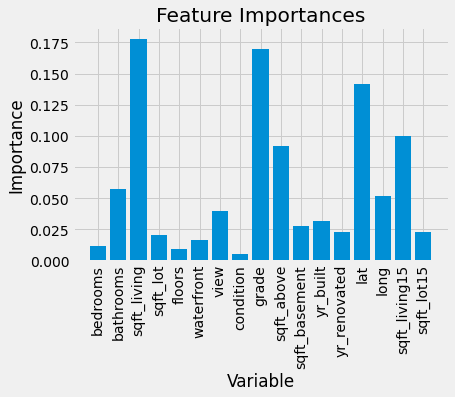

In [79]:
# Import matplotlib for plotting and use magic command for Jupyter Notebooks
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Feature Importances');

In [80]:
# Instantiate model with 1000 decision trees, base on the gridsearch best hyperpermeter
rf_most_important = RandomForestRegressor(n_estimators= 1000, max_depth= 100, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, bootstrap= True)

# Extract the ten most important features
important_indices = [feature_list.index('sqft_living'), feature_list.index('grade'), feature_list.index('lat'), feature_list.index('sqft_living15'), feature_list.index('sqft_above'), feature_list.index('bathrooms'), feature_list.index('long'), feature_list.index('view'), feature_list.index('sqft_basement'), feature_list.index('yr_built')]
train_important = X_train[:, important_indices]
test_important = X_test[:, important_indices]

# Train the random forest
rf_most_important.fit(train_important, y_train)

RandomForestRegressor(max_depth=100, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=1000)

In [81]:
# Use the forest's predict method on the test data
predictions = rf_most_important.predict(test_important)

# Calculate the absolute errors
errors = abs(predictions - y_test)

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
                         
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)

print("Evaluation Metrics for Random Forest Regression")
print(f"MAE: {mean_absolute_error(y_test, predictions)}")
print(f"MSE: {mean_squared_error(y_test, predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, predictions))}")
print(f"R-squared score for train: {rf_most_important.score(train_important, y_train)}")
print(f"R-squared score for test: {rf_most_important.score(test_important, y_test)}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(rf_most_important, X, y, cv=strat_k_fold)), 4)}")                
print('Accuracy:', round(accuracy, 2), '%.')

Evaluation Metrics for Random Forest Regression
MAE: 73695.85333294624
MSE: 17013232452.314806
RMSE: 130434.78237155458
R-squared score for train: 0.9361693980152584
R-squared score for test: 0.8527944230214293


C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.8553
Accuracy: 85.69 %.


### Feature Importance (with crime)

In [82]:
# Get numerical feature importances
importances_w_crime = list(rf_2.feature_importances_)

# List of tuples with variable and importance
feature_importances_w_crime = [(feature, round(importance, 2)) for feature, importance in zip(feature_list_w_crime, importances_w_crime)]

# Sort the feature importances by most important first
feature_importances_w_crime = sorted(feature_importances_w_crime, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances_w_crime];

Variable: sqft_living          Importance: 0.17
Variable: grade                Importance: 0.17
Variable: lat                  Importance: 0.14
Variable: sqft_living15        Importance: 0.1
Variable: sqft_above           Importance: 0.09
Variable: bathrooms            Importance: 0.06
Variable: long                 Importance: 0.05
Variable: view                 Importance: 0.04
Variable: sqft_basement        Importance: 0.03
Variable: yr_built             Importance: 0.03
Variable: sqft_lot             Importance: 0.02
Variable: waterfront           Importance: 0.02
Variable: yr_renovated         Importance: 0.02
Variable: sqft_lot15           Importance: 0.02
Variable: bedrooms             Importance: 0.01
Variable: floors               Importance: 0.01
Variable: condition            Importance: 0.01
Variable: no_of_crimes         Importance: 0.01


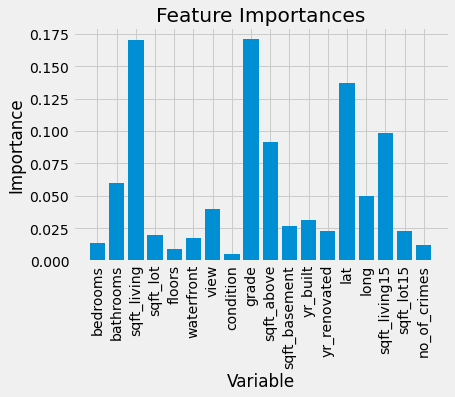

In [83]:
# Import matplotlib for plotting
import matplotlib.pyplot as plt
%matplotlib inline
# Set the style
plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances_w_crime)))
# Make a bar chart
plt.bar(x_values, importances_w_crime, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list_w_crime, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Feature Importances');

In [84]:
# New random forest with only the two most important variables
rf_2_most_important = RandomForestRegressor(n_estimators= 1000, max_depth= 100, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, bootstrap= True)

# Extract the ten most important features
important_indices_2 = [feature_list.index('grade'), feature_list.index('sqft_living'), feature_list.index('lat'), feature_list.index('sqft_living15'), feature_list.index('sqft_above'), feature_list.index('bathrooms'), feature_list.index('long'), feature_list.index('view'), feature_list.index('sqft_basement'), feature_list.index('yr_built')]
train_important_2 = X_train_2[:, important_indices_2]
test_important_2 = X_test_2[:, important_indices_2]

# Train the random forest
rf_2_most_important.fit(train_important_2, y_train_2)

RandomForestRegressor(max_depth=100, max_features=3, min_samples_leaf=3,
                      min_samples_split=8, n_estimators=1000)

In [85]:
# Use the forest's predict method on the test data
predictions_2 = rf_2_most_important.predict(test_important_2)

# Calculate the absolute errors
errors_2 = abs(predictions_2 - y_test_2)

# Calculate mean absolute percentage error (MAPE)
mape_2 = 100 * (errors_2 / y_test_2)
                         
# Calculate and display accuracy
accuracy_2 = 100 - np.mean(mape_2)

print("Evaluation Metrics for Random Forest Regression")
print(f"MAE: {mean_absolute_error(y_test_2, predictions_2)}")
print(f"MSE: {mean_squared_error(y_test_2, predictions_2)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_2, predictions_2))}")
print(f"R-squared score for train: {rf_2_most_important.score(train_important_2, y_train_2)}")
print(f"R-squared score for test: {rf_2_most_important.score(test_important_2, y_test_2)}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(rf_2_most_important, X_2, y_2, cv=strat_k_fold)), 4)}")                
print('Accuracy:', round(accuracy_2, 2), '%.')

Evaluation Metrics for Random Forest Regression
MAE: 73675.71997483307
MSE: 16995028822.20176
RMSE: 130364.9831135714
R-squared score for train: 0.9362900308273154
R-squared score for test: 0.8529519284150343


C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.8556
Accuracy: 85.7 %.


The accuracy for the top 10 features to be similar for both w/o crime rate and the crime rate is because the top 10 features do not include no_of_crimes inside due to low feature importance (0.01), and both have the same top 10 feature importance.

### Grid Search with Cross Validation

In [86]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [87]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_
print('best score: ', grid_search.best_score_)
print('best parameters: ', grid_search.best_params_)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
best score:  0.848543023259368
best parameters:  {'bootstrap': True, 'max_depth': 100, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 1000}


### Grid Search StratifiedKFold kfold=5

In [88]:
rf = RandomForestRegressor(n_estimators= 300, max_depth= 90, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, bootstrap= True)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Evaluation Metrics for Random Forest Regression")
print(f"MAE: {mean_absolute_error(y_test, rf_pred)}")
print(f"MSE: {mean_squared_error(y_test, rf_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred))}")
print(f"R-squared score for train: {rf.score(X_train, y_train)}")
print(f"R-squared score for test: {rf.score(X_test, y_test)}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(rf, X_train, y_train, cv=strat_k_fold)), 4)}")

Evaluation Metrics for Random Forest Regression
MAE: 74595.19935437123
MSE: 16914981538.373331
RMSE: 130057.60853703765
R-squared score for train: 0.9342540812195052
R-squared score for test: 0.8536445308722427


C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.8483


In [89]:
#with stratifiedkfold = 5 #using cvfold = 5 parameters
rf = RandomForestRegressor(n_estimators= 1000, max_depth= 100, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, bootstrap= True)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Evaluation Metrics for Random Forest Regression")
print(f"MAE: {mean_absolute_error(y_test, rf_pred)}")
print(f"MSE: {mean_squared_error(y_test, rf_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred))}")
print(f"R-squared score for train: {rf.score(X_train, y_train)}")
print(f"R-squared score for test: {rf.score(X_test, y_test)}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(rf, X_train, y_train, cv=strat_k_fold)), 4)}")

Evaluation Metrics for Random Forest Regression
MAE: 74671.03563999213
MSE: 17105930230.635075
RMSE: 130789.6411442247
R-squared score for train: 0.9337145372532185
R-squared score for test: 0.8519923632141285


C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.8485


In [90]:
#with stratifiedkfold = 5 #using cvfold = 10 parameters
rf = RandomForestRegressor(n_estimators= 1000, max_depth= 80, max_features= 3, min_samples_leaf= 3, min_samples_split= 8, bootstrap= True)

rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Evaluation Metrics for Random Forest Regression")
print(f"MAE: {mean_absolute_error(y_test, rf_pred)}")
print(f"MSE: {mean_squared_error(y_test, rf_pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, rf_pred))}")
print(f"R-squared score for train: {rf.score(X_train, y_train)}")
print(f"R-squared score for test: {rf.score(X_test, y_test)}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(rf, X_train, y_train, cv=strat_k_fold)), 4)}")

Evaluation Metrics for Random Forest Regression
MAE: 74793.05462455556
MSE: 17145822215.056795
RMSE: 130942.0567085182
R-squared score for train: 0.9337531267779287
R-squared score for test: 0.8516472011410141


C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.8486


# SVM with Linear Kernel

## Without Crime

In [94]:
parameters = {'kernel':["linear"], 'C':[1, 10, 100, 1000, 10000, 100000, 150000, 175000, 200000, 225000], 'epsilon': [0.1]}
clf = GridSearchCV(SVR(), parameters, cv=15, n_jobs=8, verbose=2)
clf.fit(X_train, y_train)
print(f'Best params: {clf.best_params_}')

Fitting 15 folds for each of 10 candidates, totalling 150 fits
Best params: {'C': 225000, 'epsilon': 0.1, 'kernel': 'linear'}


In [95]:
regressor_lnr = SVR(kernel="linear", C=225000, epsilon=0.1)
regressor_lnr.fit(X_train, y_train)
pred = regressor_lnr.predict(X_test)
train_adjusted_r2 = 1 - (1-regressor_lnr.score(X_train, y_train)) * (len(y)-1)/(len(y)-X.shape[1]-1)
test_adjusted_r2 = 1 - (1-regressor_lnr.score(X_test, y_test)) * (len(y)-1)/(len(y)-X.shape[1]-1)

print("Evaluation Metrics for LR")
print(f"MAE: {mean_absolute_error(y_test, pred)}")
print(f"MSE: {mean_squared_error(y_test, pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, pred))}")
print(f"R-squared score for train: {regressor_lnr.score(X_train, y_train)}")
print(f"Adjusted R-squared score for train: {train_adjusted_r2}")
print(f"R-squared score for test: {regressor_lnr.score(X_test, y_test)}")
print(f"Adjusted R-squared score for test: {test_adjusted_r2}")
print(f"Model Complexity: {np.sum(regressor_lnr.coef_!=0)}")

Evaluation Metrics for LR
MAE: 114076.1592673103
MSE: 36497924333.64386
RMSE: 191044.29940106525
R-squared score for train: 0.6643101906619613
Adjusted R-squared score for train: 0.6640455247330703
R-squared score for test: 0.6842047491496388
Adjusted R-squared score for test: 0.6839557685697085
Model Complexity: 17


## With Crime

In [96]:
regressor_lnr_crime = SVR(kernel="linear", C=225000, epsilon=0.1)
regressor_lnr_crime.fit(X_train_2, y_train_2)
pred = regressor_lnr_crime.predict(X_test_2)
train_adjusted_r2 = 1 - (1-regressor_lnr_crime.score(X_train_2, y_train_2)) * (len(y)-1)/(len(y)-X_2.shape[1]-1)
test_adjusted_r2 = 1 - (1-regressor_lnr_crime.score(X_test_2, y_test_2)) * (len(y)-1)/(len(y)-X_2.shape[1]-1)

print("Evaluation Metrics for LR")
print(f"MAE: {mean_absolute_error(y_test_2, pred)}")
print(f"MSE: {mean_squared_error(y_test_2, pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_2, pred))}")
print(f"R-squared score for train: {regressor_lnr_crime.score(X_train_2, y_train_2)}")
print(f"Adjusted R-squared score for train: {train_adjusted_r2}")
print(f"R-squared score for test: {regressor_lnr_crime.score(X_test_2, y_test_2)}")
print(f"Adjusted R-squared score for test: {test_adjusted_r2}")
print(f"Model Complexity: {np.sum(regressor_lnr_crime.coef_!=0)}")

Evaluation Metrics for LR
MAE: 113519.02622600753
MSE: 36289551272.282364
RMSE: 190498.16606015494
R-squared score for train: 0.6655860191767213
Adjusted R-squared score for train: 0.6653068367800412
R-squared score for test: 0.6860076797103352
Adjusted R-squared score for test: 0.685745546146715
Model Complexity: 18


# SVM with RBF Kernel

## Without Crime

In [97]:
# using Grid Search CV to find the best hyper param values
# kept epsilon at 0.1 because the difference between 0.1, 0.01, and 0.001 is minute from prior experiments
parameters = {'kernel':["rbf"], 'C':[150000, 175000, 200000, 225000], 'epsilon': [0.1], 'gamma': ['auto']}

# remove n_jobs if you do not wish you use all processors to run the grid search cv.
clf = GridSearchCV(estimator=SVR(), param_grid=parameters, cv=15, n_jobs=-1, verbose=2)
clf.fit(X_train, y_train)

print(f'Best params: {clf.best_params_}')

Fitting 15 folds for each of 4 candidates, totalling 60 fits
Best params: {'C': 225000, 'epsilon': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}


In [98]:
# from Grid Search CV, C=22500 is the best value
regressor_rbf = SVR(kernel="rbf", C=225000, epsilon=0.1, gamma="auto")
regressor_rbf.fit(X_train, y_train)
pred = regressor_rbf.predict(X_test)
train_adjusted_r2 = 1 - (1-regressor_rbf.score(X_train, y_train)) * (len(y)-1)/(len(y)-X.shape[1]-1)
test_adjusted_r2 = 1 - (1-regressor_rbf.score(X_test, y_test)) * (len(y)-1)/(len(y)-X.shape[1]-1)

print("Evaluation Metrics for LR")
print(f"MAE: {mean_absolute_error(y_test, pred)}")
print(f"MSE: {mean_squared_error(y_test, pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, pred))}")
print(f"R-squared score for train: {regressor_rbf.score(X_train, y_train)}")
print(f"Adjusted R-squared score for train: {train_adjusted_r2}")
print(f"R-squared score for test: {regressor_rbf.score(X_test, y_test)}")
print(f"Adjusted R-squared score for test: {test_adjusted_r2}")

Evaluation Metrics for LR
MAE: 107228.16431769499
MSE: 33355614720.104248
RMSE: 182635.19573210485
R-squared score for train: 0.6958074397862879
Adjusted R-squared score for train: 0.6955676070470413
R-squared score for test: 0.7113933213979109
Adjusted R-squared score for test: 0.7111657769430256


## With Crime

In [99]:
# from Grid Search CV, C=22500 is the best value
regressor_rbf_crime = SVR(kernel="rbf", C=225000, epsilon=0.1, gamma="auto")
regressor_rbf_crime.fit(X_train_2, y_train_2)
pred = regressor_rbf_crime.predict(X_test_2)
train_adjusted_r2 = 1 - (1-regressor_rbf_crime.score(X_train_2, y_train_2)) * (len(y)-1)/(len(y)-X_2.shape[1]-1)
test_adjusted_r2 = 1 - (1-regressor_rbf_crime.score(X_test_2, y_test_2)) * (len(y)-1)/(len(y)-X_2.shape[1]-1)

print("Evaluation Metrics for LR")
print(f"MAE: {mean_absolute_error(y_test_2, pred)}")
print(f"MSE: {mean_squared_error(y_test_2, pred)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_2, pred))}")
print(f"R-squared score for train: {regressor_rbf_crime.score(X_train_2, y_train_2)}")
print(f"Adjusted R-squared score for train: {train_adjusted_r2}")
print(f"R-squared score for test: {regressor_rbf_crime.score(X_test_2, y_test_2)}")
print(f"Adjusted R-squared score for test: {test_adjusted_r2}")

Evaluation Metrics for LR
MAE: 105868.95588701674
MSE: 33018779883.82916
RMSE: 181710.70382294257
R-squared score for train: 0.6978188172477022
Adjusted R-squared score for train: 0.6975665441022294
R-squared score for test: 0.7143077567681048
Adjusted R-squared score for test: 0.7140692492601889


# Stacking Ensemble (without Crime Rate)

In [71]:
level_0 = [
    ('linear_regression', LinearRegression()),
    ('lasso_regression', Lasso(alpha=0.0001, fit_intercept=True)),
    ('XGBoost', XGBRegressor(learning_rate=0.03, n_estimators=700, max_depth=4, n_thread=4, subsample=0.9, colsample_bytree=0.7, min_child_weight=4)),
    ('random_forest', RandomForestRegressor(n_estimators=1000, max_features=8, min_samples_split=8, min_samples_leaf=3, max_depth=100, bootstrap=True)),
    ('polynomial_regression', make_pipeline(PolynomialFeatures(degree=2), LinearRegression())),
    ('decision_tree', DecisionTreeRegressor(max_depth=7, min_samples_leaf=6, criterion="mse")),
]

level_1 = LinearRegression()

stacking_ensemble = StackingRegressor(estimators=level_0, final_estimator=level_1, cv=5, n_jobs=-1)

stacking_ensemble.fit(X_train, y_train)

stacking_predictions = stacking_ensemble.predict(X_test)

train_adjusted_r2 = 1 - (1-stacking_ensemble.score(X_train, y_train)) * (len(y)-1)/(len(y)-X.shape[1]-1)
test_adjusted_r2 = 1 - (1-stacking_ensemble.score(X_test, y_test)) * (len(y)-1)/(len(y)-X.shape[1]-1)

print("Evaluation Metrics for Stacking Regressor")
print(f"MAE: {mean_absolute_error(y_test, stacking_predictions)}")
print(f"MSE: {mean_squared_error(y_test, stacking_predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, stacking_predictions))}")
print(f"R-squared score for train: {stacking_ensemble.score(X_train, y_train)}")
print(f"Adjusted R-squared score for train: {train_adjusted_r2}")
print(f"R-squared score for test: {stacking_ensemble.score(X_test, y_test)}")
print(f"Adjusted R-squared score for test: {test_adjusted_r2}")


Evaluation Metrics for Stacking Regressor
MAE: 66186.83602522785
MSE: 12320431499.124798
RMSE: 110997.43915570664
R-squared score for train: 0.9456391475268594
Adjusted R-squared score for train: 0.945596288121793
R-squared score for test: 0.8933984924653833
Adjusted R-squared score for test: 0.8933144452699427


In [72]:
print(f"Cross Validation Score: {round(np.mean(cross_val_score(stacking_ensemble, X, y, cv=strat_k_fold, n_jobs=-1)), 4)}")

C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.8954


# Stacking Ensemble (with Crime Rate)

In [112]:
level_0 = [
    ('linear_regression', LinearRegression()),
    ('lasso_regression', Lasso(alpha=0.0001, fit_intercept=True)),
    ('XGBoost', XGBRegressor(learning_rate=0.03, n_estimators=700, max_depth=4, n_thread=4, subsample=0.9, colsample_bytree=0.7, min_child_weight=4)),
    ('random_forest', RandomForestRegressor(n_estimators=1000, max_features=8, min_samples_split=8, min_samples_leaf=3, max_depth=100, bootstrap=True)),
    ('polynomial_regression', make_pipeline(PolynomialFeatures(degree=2), LinearRegression())),
    ('decision_tree', DecisionTreeRegressor(max_depth=7, min_samples_leaf=6, criterion="mse")),
]

level_1 = LinearRegression()

stacking_ensemble_with_crime = StackingRegressor(estimators=level_0, final_estimator=level_1, cv=5, n_jobs=-1)

stacking_ensemble_with_crime.fit(X_train_2, y_train_2)

stacking_predictions_with_crime = stacking_ensemble_with_crime.predict(X_test_2)

print("Evaluation Metrics for Stacking Regressor")
print(f"MAE: {mean_absolute_error(y_test_2, stacking_predictions_with_crime)}")
print(f"MSE: {mean_squared_error(y_test_2, stacking_predictions_with_crime)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_2, stacking_predictions_with_crime))}")
print(f"R-squared score for train: {stacking_ensemble_with_crime.score(X_train_2, y_train_2)}")
print(f"R-squared score for test: {stacking_ensemble_with_crime.score(X_test_2, y_test_2)}")

Evaluation Metrics for Stacking Regressor
MAE: 65950.00557382997
MSE: 12083858026.61007
RMSE: 109926.60290671258
R-squared score for train: 0.9447615920798877
R-squared score for test: 0.8954454247351306


In [113]:
train_adjusted_r2 = 1 - (1-stacking_ensemble_with_crime.score(X_train_2, y_train_2)) * (len(y_2)-1)/(len(y_2)-X_2.shape[1]-1)
test_adjusted_r2 = 1 - (1-stacking_ensemble_with_crime.score(X_test_2, y_test_2)) * (len(y_2)-1)/(len(y_2)-X_2.shape[1]-1)
print(f"Adjusted R-squared score for train: {train_adjusted_r2}")
print(f"Adjusted R-squared score for test: {test_adjusted_r2}")

Adjusted R-squared score for train: 0.9447154768096052
Adjusted R-squared score for test: 0.8953581383219416


In [114]:
print(f"Cross Validation Score: {round(np.mean(cross_val_score(stacking_ensemble_with_crime, X_2, y_2, cv=strat_k_fold, n_jobs=-1)), 4)}")

C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.8962


## Stacking Ensemble (Random Forest Regressor as final estimator)

### without crime

In [115]:
level_0 = [
    ('linear_regression', LinearRegression()),
    ('lasso_regression', Lasso(alpha=0.0001, fit_intercept=True)),
    ('XGBoost', XGBRegressor(learning_rate=0.03, n_estimators=700, max_depth=4, n_thread=4, subsample=0.9, colsample_bytree=0.7, min_child_weight=4)),
    ('random_forest', RandomForestRegressor(n_estimators=1000, max_features=8, min_samples_split=8, min_samples_leaf=3, max_depth=100, bootstrap=True)),
    ('polynomial_regression', make_pipeline(PolynomialFeatures(degree=2), LinearRegression())),
    ('decision_tree', DecisionTreeRegressor(max_depth=7, min_samples_leaf=6, splitter="best", criterion="mse")),
]

level_1 = RandomForestRegressor()

stacking_ensemble_rf = StackingRegressor(estimators=level_0, final_estimator=level_1, cv=5, n_jobs=-1)

stacking_ensemble_rf.fit(X_train, y_train)

stacking_predictions_rf = stacking_ensemble_rf.predict(X_test)

print("Evaluation Metrics for Stacking Regressor")
print(f"MAE: {mean_absolute_error(y_test, stacking_predictions_rf)}")
print(f"MSE: {mean_squared_error(y_test, stacking_predictions_rf)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, stacking_predictions_rf))}")
print(f"R-squared score for train: {stacking_ensemble_rf.score(X_train, y_train)}")
print(f"R-squared score for test: {stacking_ensemble_rf.score(X_test, y_test)}")


Evaluation Metrics for Stacking Regressor
MAE: 67359.02523853657
MSE: 13190947532.64364
RMSE: 114851.85036665121
R-squared score for train: 0.9463483882096954
R-squared score for test: 0.8858664249795363


In [116]:
print(f"Cross Validation Score: {round(np.mean(cross_val_score(stacking_ensemble_rf, X, y, cv=strat_k_fold, n_jobs=-1)), 4)}")

C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.8895


### with crime

In [117]:
level_0 = [
    ('linear_regression', LinearRegression()),
    ('lasso_regression', Lasso(alpha=0.0001, fit_intercept=True)),
    ('XGBoost', XGBRegressor(learning_rate=0.03, n_estimators=700, max_depth=4, n_thread=4, subsample=0.9, colsample_bytree=0.7, min_child_weight=4)),
    ('random_forest', RandomForestRegressor(n_estimators=1000, max_features=8, min_samples_split=8, min_samples_leaf=3, max_depth=100, bootstrap=True)),
    ('polynomial_regression', make_pipeline(PolynomialFeatures(degree=2), LinearRegression())),
    ('decision_tree', DecisionTreeRegressor(max_depth=7, min_samples_leaf=6, splitter="best", criterion="mse")),
]

level_1 = RandomForestRegressor()

stacking_ensemble_with_crime_rf = StackingRegressor(estimators=level_0, final_estimator=level_1, cv=5, n_jobs=-1)

stacking_ensemble_with_crime_rf.fit(X_train_2, y_train_2)

stacking_predictions_with_crime_rf = stacking_ensemble_with_crime_rf.predict(X_test_2)

print("Evaluation Metrics for Stacking Regressor")
print(f"MAE: {mean_absolute_error(y_test_2, stacking_predictions_with_crime_rf)}")
print(f"MSE: {mean_squared_error(y_test_2, stacking_predictions_with_crime_rf)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test_2, stacking_predictions_with_crime))}")
print(f"R-squared score for train: {stacking_ensemble_with_crime_rf.score(X_train_2, y_train_2)}")
print(f"R-squared score for test: {stacking_ensemble_with_crime_rf.score(X_test_2, y_test_2)}")

Evaluation Metrics for Stacking Regressor
MAE: 67122.6411283596
MSE: 13381532220.466856
RMSE: 109926.60290671258
R-squared score for train: 0.9457478849484678
R-squared score for test: 0.8842174068395131


In [118]:
print(f"Cross Validation Score: {round(np.mean(cross_val_score(stacking_ensemble_with_crime_rf, X_2, y_2, cv=strat_k_fold, n_jobs=-1)), 4)}")

C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.8902


### meta model lasso without crime

In [65]:
level_0 = [
    ('linear_regression', LinearRegression()),
    ('lasso_regression', Lasso(alpha=0.0001, fit_intercept=True)),
    ('XGBoost', XGBRegressor(learning_rate=0.03, n_estimators=700, max_depth=4, n_thread=4, subsample=0.9, colsample_bytree=0.7, min_child_weight=4)),
    ('random_forest', RandomForestRegressor(n_estimators=1000, max_features=8, min_samples_split=8, min_samples_leaf=3, max_depth=100, bootstrap=True)),
    ('polynomial_regression', make_pipeline(PolynomialFeatures(degree=2), LinearRegression())),
    ('decision_tree', DecisionTreeRegressor(max_depth=7, min_samples_leaf=6, criterion="mse")),
]

level_1 = Lasso(alpha=0.0001, fit_intercept=True)

stacking_ensemble = StackingRegressor(estimators=level_0, final_estimator=level_1, cv=5, n_jobs=-1)

stacking_ensemble.fit(X_train, y_train)

stacking_predictions = stacking_ensemble.predict(X_test)

print("Evaluation Metrics for Stacking Regressor")
print(f"MAE: {mean_absolute_error(y_test, stacking_predictions)}")
print(f"MSE: {mean_squared_error(y_test, stacking_predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, stacking_predictions))}")
print(f"R-squared score for train: {stacking_ensemble.score(X_train, y_train)}")
print(f"R-squared score for test: {stacking_ensemble.score(X_test, y_test)}")

C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 112143877191827.94, tolerance: 211167416939.1139
  model = cd_fast.enet_coordinate_descent(


Evaluation Metrics for Stacking Regressor
MAE: 66299.0425307682
MSE: 12322888489.841545
RMSE: 111008.50638505837
R-squared score for train: 0.9452250848649018
R-squared score for test: 0.8933772335578181


In [66]:
train_adjusted_r2 = 1 - (1-stacking_ensemble.score(X_train, y_train)) * (len(y)-1)/(len(y)-X.shape[1]-1)
test_adjusted_r2 = 1 - (1-stacking_ensemble.score(X_test, y_test)) * (len(y)-1)/(len(y)-X.shape[1]-1)
print(f"Adjusted R-squared score for train: {train_adjusted_r2}")
print(f"Adjusted R-squared score for test: {test_adjusted_r2}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(stacking_ensemble, X, y, cv=strat_k_fold, n_jobs=-1)), 4)}")

Adjusted R-squared score for train: 0.9451818990028622
Adjusted R-squared score for test: 0.8932931696013429


C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.8956


### metamodel xgboost

In [67]:
level_0 = [
    ('linear_regression', LinearRegression()),
    ('lasso_regression', Lasso(alpha=0.0001, fit_intercept=True)),
    ('XGBoost', XGBRegressor(learning_rate=0.03, n_estimators=700, max_depth=4, n_thread=4, subsample=0.9, colsample_bytree=0.7, min_child_weight=4)),
    ('random_forest', RandomForestRegressor(n_estimators=1000, max_features=8, min_samples_split=8, min_samples_leaf=3, max_depth=100, bootstrap=True)),
    ('polynomial_regression', make_pipeline(PolynomialFeatures(degree=2), LinearRegression())),
    ('decision_tree', DecisionTreeRegressor(max_depth=7, min_samples_leaf=6, criterion="mse")),
]

level_1 = XGBRegressor(learning_rate=0.03, n_estimators=700, max_depth=4, n_thread=4, subsample=0.9, colsample_bytree=0.7, min_child_weight=4)

stacking_ensemble = StackingRegressor(estimators=level_0, final_estimator=level_1, cv=5, n_jobs=-1)

stacking_ensemble.fit(X_train, y_train)

stacking_predictions = stacking_ensemble.predict(X_test)

print("Evaluation Metrics for Stacking Regressor")
print(f"MAE: {mean_absolute_error(y_test, stacking_predictions)}")
print(f"MSE: {mean_squared_error(y_test, stacking_predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, stacking_predictions))}")
print(f"R-squared score for train: {stacking_ensemble.score(X_train, y_train)}")
print(f"R-squared score for test: {stacking_ensemble.score(X_test, y_test)}")

[20:22:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "n_thread" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


Evaluation Metrics for Stacking Regressor
MAE: 65986.95913099514
MSE: 13088077222.43852
RMSE: 114403.13467050857
R-squared score for train: 0.947870306118449
R-squared score for test: 0.8867565017718303


In [68]:
train_adjusted_r2 = 1 - (1-stacking_ensemble.score(X_train, y_train)) * (len(y)-1)/(len(y)-X.shape[1]-1)
test_adjusted_r2 = 1 - (1-stacking_ensemble.score(X_test, y_test)) * (len(y)-1)/(len(y)-X.shape[1]-1)
print(f"Adjusted R-squared score for train: {train_adjusted_r2}")
print(f"Adjusted R-squared score for test: {test_adjusted_r2}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(stacking_ensemble, X, y, cv=strat_k_fold, n_jobs=-1)), 4)}")

Adjusted R-squared score for train: 0.9478292058125412
Adjusted R-squared score for test: 0.8866672178709918


C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.8912


### metamodel DT

In [69]:
level_0 = [
    ('linear_regression', LinearRegression()),
    ('lasso_regression', Lasso(alpha=0.0001, fit_intercept=True)),
    ('XGBoost', XGBRegressor(learning_rate=0.03, n_estimators=700, max_depth=4, n_thread=4, subsample=0.9, colsample_bytree=0.7, min_child_weight=4)),
    ('random_forest', RandomForestRegressor(n_estimators=1000, max_features=8, min_samples_split=8, min_samples_leaf=3, max_depth=100, bootstrap=True)),
    ('polynomial_regression', make_pipeline(PolynomialFeatures(degree=2), LinearRegression())),
    ('decision_tree', DecisionTreeRegressor(max_depth=7, min_samples_leaf=6, criterion="mse")),
]

level_1 = DecisionTreeRegressor(max_depth=7, min_samples_leaf=6, criterion="mse")

stacking_ensemble = StackingRegressor(estimators=level_0, final_estimator=level_1, cv=5, n_jobs=-1)

stacking_ensemble.fit(X_train, y_train)

stacking_predictions = stacking_ensemble.predict(X_test)

print("Evaluation Metrics for Stacking Regressor")
print(f"MAE: {mean_absolute_error(y_test, stacking_predictions)}")
print(f"MSE: {mean_squared_error(y_test, stacking_predictions)}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, stacking_predictions))}")
print(f"R-squared score for train: {stacking_ensemble.score(X_train, y_train)}")
print(f"R-squared score for test: {stacking_ensemble.score(X_test, y_test)}")




Evaluation Metrics for Stacking Regressor
MAE: 67596.50430681268
MSE: 13646010927.866308
RMSE: 116816.14155529324
R-squared score for train: 0.9399158302451829
R-squared score for test: 0.8819290268487968


In [70]:
train_adjusted_r2 = 1 - (1-stacking_ensemble.score(X_train, y_train)) * (len(y)-1)/(len(y)-X.shape[1]-1)
test_adjusted_r2 = 1 - (1-stacking_ensemble.score(X_test, y_test)) * (len(y)-1)/(len(y)-X.shape[1]-1)
print(f"Adjusted R-squared score for train: {train_adjusted_r2}")
print(f"Adjusted R-squared score for test: {test_adjusted_r2}")
print(f"Cross Validation Score: {round(np.mean(cross_val_score(stacking_ensemble, X, y, cv=strat_k_fold, n_jobs=-1)), 4)}")

Adjusted R-squared score for train: 0.9398684584389575
Adjusted R-squared score for test: 0.8818359368504863


C:\Users\Sherman\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


Cross Validation Score: 0.8801
